# Qiskit Tutorial 12 - Resumo geral de visualização de dados no Qiskit

<div class="alert alert-block alert-info">
Nós já passamos por várias formas de visualizar dados no Qiskit: por histogramas, esferas de bloch,...
<br/>
Nesse tutorial vamos fazer um resumo geral, mostrar dicas e outras ferramentas úteis de visualização.
</div>

In [1]:
from qiskit import *
%matplotlib inline
import numpy as np

## `plot_histogram()`

<div class="alert alert-block alert-info">
O plot_histogram é usado para visualizar o resultado da execução de um circuito.
</div>

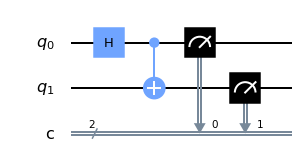

In [2]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.draw(output='mpl')

In [3]:
backend = Aer.get_backend('qasm_simulator')
result = execute(qc,backend).result()

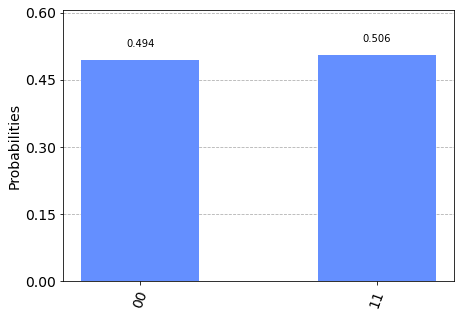

In [4]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(result.get_counts(qc))

<div class="alert alert-block alert-info">
Podemos customizar o histograma na hora de exibir
</div>

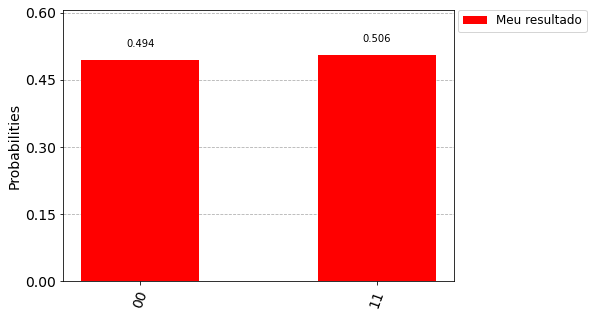

In [5]:
counts = result.get_counts(qc)
legenda = ['Meu resultado']
plot_histogram(counts,color='red' ,legend=legenda)

<div class="alert alert-block alert-info">
Podemos exibir dois histogramas ao mesmo tempo para por exemplo comparar os resultados encontrados em um computador quântico real e no simulador
</div>

In [6]:
IBMQ.load_account()
provedor = IBMQ.get_provider('ibm-q')
backend = provedor.get_backend('ibmq_valencia')

/usr/local/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [7]:
job = execute(qc,backend)

In [8]:
from qiskit.tools.monitor import job_monitor

job_monitor(job)

Job Status: job has successfully run


In [9]:
result2 = job.result()
counts2 = result2.get_counts(qc)
legenda = ['Simulador','CQ Real']

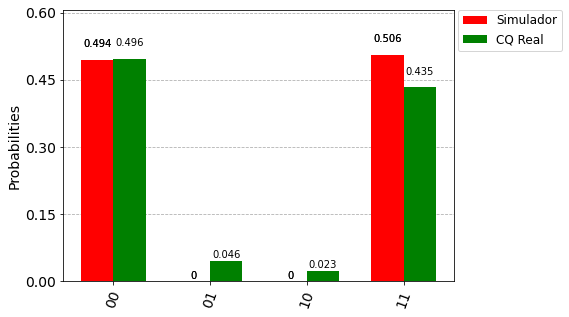

In [10]:
plot_histogram([counts,counts2],color=['red','green'] ,legend=legenda)

## `plot_state_city()`



<div class="alert alert-block alert-info">
Podemos plotar em um histograma 3D um operador de densidade <br/>
Para o exemplo vamos usar o circuito anterior
</div>

In [11]:
qc2 = QuantumCircuit(2,2)
qc2.h(0)
qc2.cx(0,1)

In [12]:
backend_st = Aer.get_backend('statevector_simulator')
result3 = execute(qc2, backend_st).result()
statevector = result3.get_statevector()

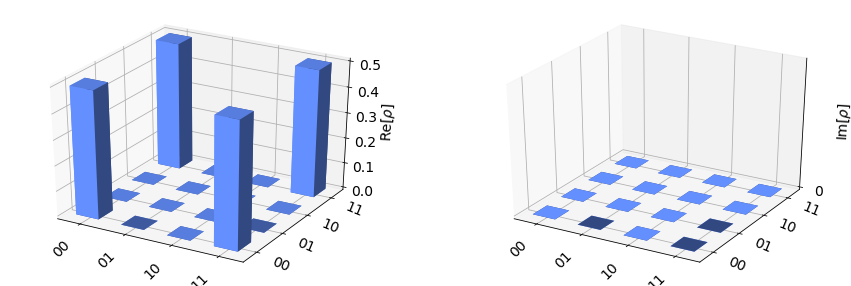

In [13]:
from qiskit.tools.visualization import plot_state_city

plot_state_city(statevector)

## `plot_state_paulivec()`


<div class="alert alert-block alert-info">
Podemos plotar em um histograma que mostra os operadores de Pauli que compõem o operador de densidade 
</div>

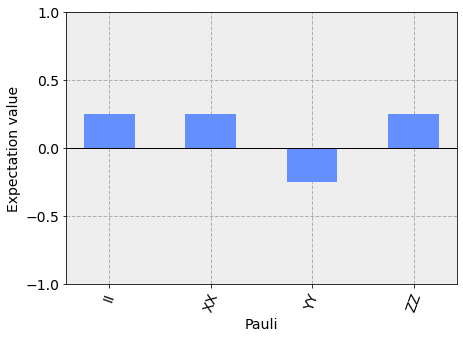

In [14]:
from qiskit.tools.visualization import plot_state_paulivec

plot_state_paulivec(statevector)

## `plot_state_hinton()`

<div class="alert alert-block alert-info">
Funciona igual ao plot_state_city, porém é 2D e o tamanho de cada elemento representa seu valor na matriz</div>

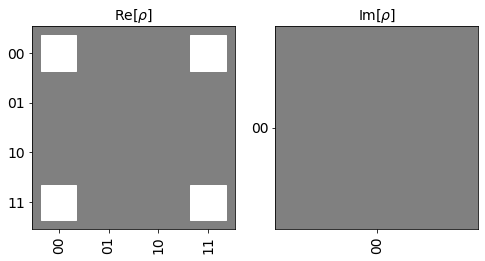

In [15]:
from qiskit.tools.visualization import plot_state_hinton

plot_state_hinton(statevector)

## `plot_bloch_multivector()`

<div class="alert alert-block alert-info">
Mostra os estados dos qubits em uma esfera de bloch</div>

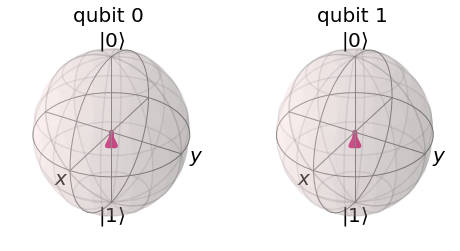

In [16]:
from qiskit.tools.visualization import plot_bloch_multivector

plot_bloch_multivector(statevector)

 <div class="alert alert-block alert-warning"><b>Dica: </b> Podemos rotacionar a esfera de bloch com o seguinte comando </div> 

In [17]:
%matplotlib notebook 
# Repare que não está escrito inline como geralmente

 <div class="alert alert-block alert-warning"><b>OBS: </b> Esse comando pode ser útil também para plot_bloch_vector() e plot_state_city() </div> 

<IPython.core.display.Javascript object>


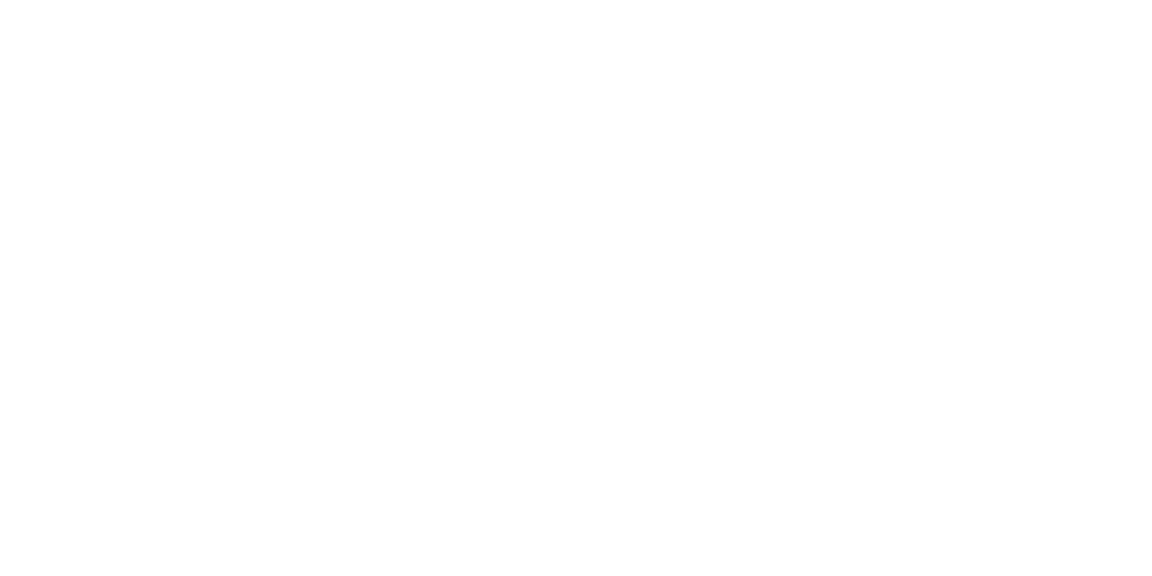

<IPython.core.display.Javascript object>


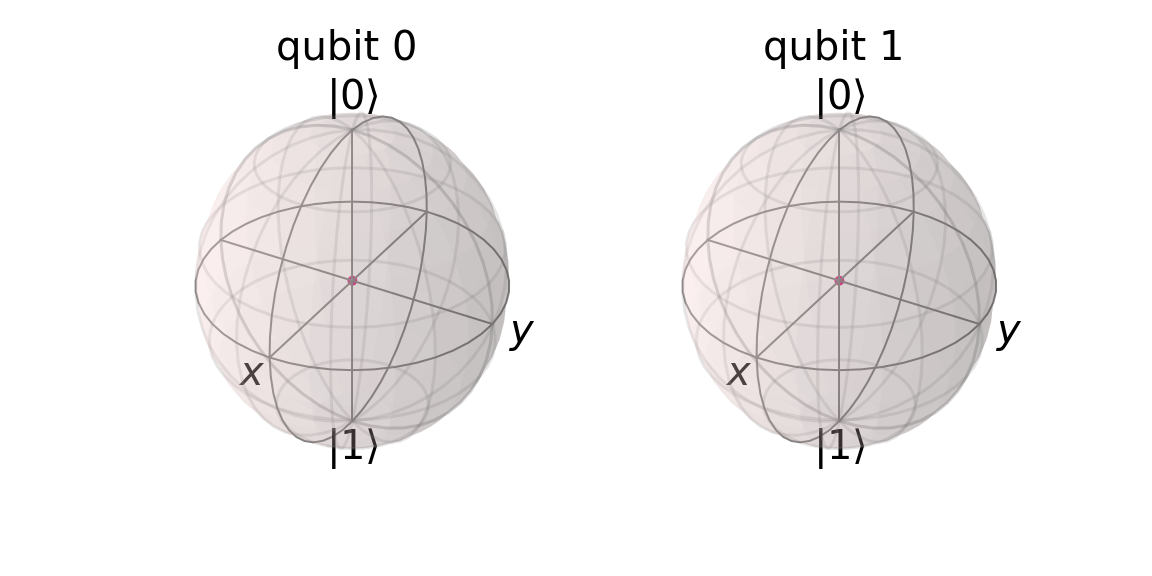

In [18]:
plot_bloch_multivector(statevector)

In [19]:
# Para voltar ao normal é necessário apenas rodar o comando original

%matplotlib inline

## `plot_bloch_vector()`

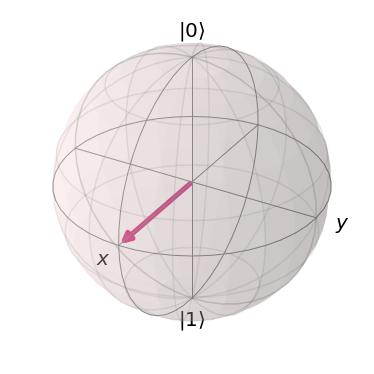

In [20]:
from qiskit.tools.visualization import plot_bloch_vector
plot_bloch_vector([1,0,0])